In [13]:
import pandas as pd

# Load the dataset
file_path = 'weather.csv' 
weather_data = pd.read_csv(file_path)

# Convert 'dt_iso' column to datetime format with a specified format

weather_data['dt_iso'] = weather_data['dt_iso'].str.replace(' +0000 UTC', '', regex=False)
weather_data['dt_iso'] = pd.to_datetime(weather_data['dt_iso'], errors='coerce')

# Select only the necessary columns for forecasting
forecasting_features = weather_data[[
    "dt_iso", "temp", "visibility", "dew_point", "feels_like", 
    "pressure", "humidity", "wind_speed", "wind_deg", 
    "rain_1h", "rain_3h", "clouds_all"
]]

# Filter out data for the year 2024
forecasting_features = forecasting_features[forecasting_features['dt_iso'].dt.year != 2024]

# Reset the index
forecasting_features.reset_index(drop=True, inplace=True)

# Save the cleaned dataset to a new CSV file
output_path = 'filtered_weather_data.csv'  # Specify where to save the new file
forecasting_features.to_csv(output_path, index=False)

print("Data cleaning complete. File saved as 'filtered_weather_data.csv'.")



Data cleaning complete. File saved as 'filtered_weather_data.csv'.


In [15]:
weather_data

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_speed,wind_deg,wind_gust,rain_1h,rain_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,946684800,2000-01-01 00:00:00,25200,Da Nang,16.054456,108.071722,20.83,10000.0,19.66,21.40,...,1.00,290,NaN,NaN,NaN,40,802,Clouds,scattered clouds,03d
1,946688400,2000-01-01 01:00:00,25200,Da Nang,16.054456,108.071722,21.12,6000.0,19.05,21.59,...,0.67,260,NaN,NaN,NaN,20,801,Clouds,few clouds,02d
2,946692000,2000-01-01 02:00:00,25200,Da Nang,16.054456,108.071722,21.72,7000.0,19.65,22.25,...,3.00,330,NaN,0.11,NaN,75,500,Rain,light rain,10d
3,946695600,2000-01-01 03:00:00,25200,Da Nang,16.054456,108.071722,22.50,10000.0,19.66,23.00,...,1.00,340,NaN,0.10,NaN,40,500,Rain,light rain,10d
4,946699200,2000-01-01 04:00:00,25200,Da Nang,16.054456,108.071722,22.98,8000.0,17.88,23.24,...,3.00,10,NaN,0.15,NaN,20,500,Rain,light rain,10d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217462,1704139200,2024-01-01 20:00:00,25200,Da Nang,16.054456,108.071722,22.46,6000.0,22.46,23.37,...,0.00,0,0.0,NaN,NaN,75,803,Clouds,broken clouds,04n
217463,1704142800,2024-01-01 21:00:00,25200,Da Nang,16.054456,108.071722,22.60,10000.0,21.93,23.42,...,1.03,270,NaN,NaN,NaN,100,500,Rain,light rain,10n
217464,1704146400,2024-01-01 22:00:00,25200,Da Nang,16.054456,108.071722,22.44,6000.0,22.44,23.35,...,0.51,300,NaN,NaN,NaN,75,803,Clouds,broken clouds,04n
217465,1704150000,2024-01-01 23:00:00,25200,Da Nang,16.054456,108.071722,22.38,4500.0,22.38,23.28,...,1.03,0,NaN,NaN,NaN,75,701,Mist,mist,50n


In [17]:
import pandas as pd

# Load the dataset to perform Exploratory Data Analysis (EDA)
file_path = 'filtered_weather_data.csv'
weather_data = pd.read_csv(file_path)

# Display the first few rows and summary information to understand the structure of the data
weather_data.head(), weather_data.info()

# Display the statistical summary for all columns
weather_data.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217442 entries, 0 to 217441
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   dt_iso      217442 non-null  object 
 1   temp        217442 non-null  float64
 2   visibility  205466 non-null  float64
 3   dew_point   217442 non-null  float64
 4   feels_like  217442 non-null  float64
 5   pressure    217442 non-null  int64  
 6   humidity    217442 non-null  int64  
 7   wind_speed  217442 non-null  float64
 8   wind_deg    217442 non-null  int64  
 9   rain_1h     76279 non-null   float64
 10  rain_3h     0 non-null       float64
 11  clouds_all  217442 non-null  int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 19.9+ MB


,dt_iso,temp,visibility,dew_point,feels_like,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,clouds_all
count,217442,217442.000000,205466.000000,217442.000000,217442.000000,217442.000000,217442.000000,217442.000000,217442.000000,76279.000000,0.0,217442.000000
unique,210384,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2005-05-01 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,25.913694,8239.651534,21.768624,27.828070,1011.123458,79.183971,2.179560,141.893544,1.090745,NaN,53.215391
std,NaN,3.351451,2242.543300,2.898615,4.895322,5.185508,13.076059,1.756719,123.829551,1.646499,NaN,25.465189
min,NaN,15.530000,100.000000,5.890000,15.340000,987.000000,24.000000,0.000000,0.000000,0.100000,NaN,0.000000
25%,NaN,23.470000,7000.000000,20.070000,24.090000,1007.000000,70.000000,1.000000,10.000000,0.220000,NaN,39.000000
50%,NaN,26.030000,9999.000000,22.140000,26.400000,1011.000000,83.000000,1.540000,120.000000,0.490000,NaN,43.000000
75%,NaN,28.250000,10000.000000,23.920000,32.070000,1015.000000,88.000000,3.090000,233.000000,1.230000,NaN,75.000000


In [ ]:
"""Here's the statistical summary for all columns in the dataset:

- **Temperature (temp)**: 
  - Mean: 25.91°C
  - Range: 15.53°C to 36.39°C
  
- **Visibility**:
  - Mean: 8239.65 meters
  - Range: 100 to 10,000 meters

- **Dew Point**:
  - Mean: 21.77°C
  - Range: 5.89°C to 29.97°C

- **Feels Like Temperature (feels_like)**:
  - Mean: 27.83°C
  - Range: 15.34°C to 43.35°C

- **Pressure**:
  - Mean: 1011.12 hPa
  - Range: 987 to 1032 hPa

- **Humidity**:
  - Mean: 79.18%
  - Range: 24% to 100%

- **Wind Speed**:
  - Mean: 2.18 m/s
  - Range: 0 to 27.3 m/s

- **Wind Direction (wind_deg)**:
  - Mean: 141.89° (indicative of predominant wind direction)
  - Range: 0° to 360°

- **Rainfall in 1 Hour (rain_1h)**:
  - Mean (only non-missing values): 1.09 mm
  - Range: 0.1 mm to 38.44 mm

- **Cloud Cover (clouds_all)**:
  - Mean: 53.22%
  - Range: 0% to 100%

The `rain_3h` column has no values and can likely be dropped. If you need further analysis, such as correlations, missing data handling, or visualizations, please let me know!"""

<Figure size 1400x800 with 0 Axes>

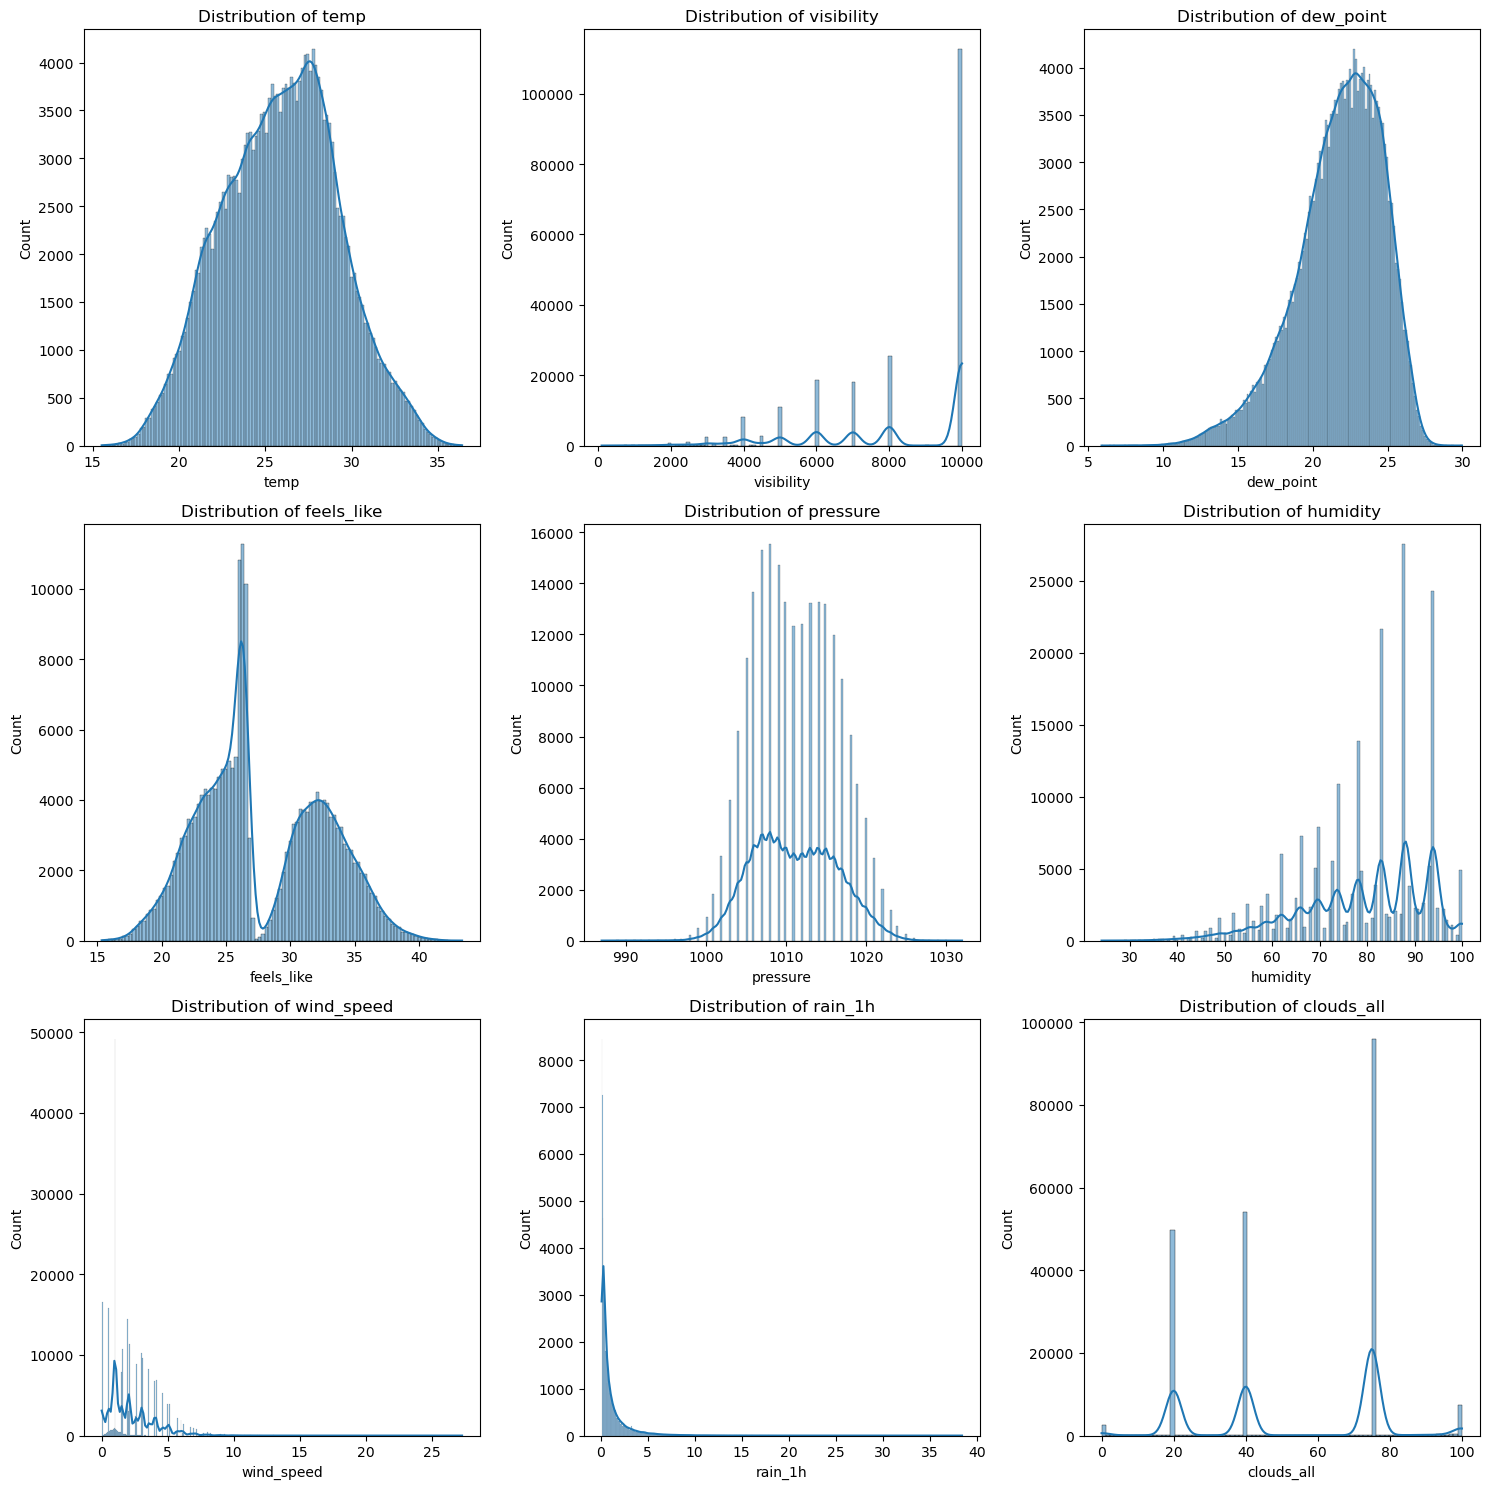

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting style
plt.style.use('default')
plt.figure(figsize=(14, 8))

# Histograms for continuous features
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
continuous_features = ['temp', 'visibility', 'dew_point', 'feels_like', 'pressure', 'humidity', 'wind_speed', 'rain_1h', 'clouds_all']
for i, feature in enumerate(continuous_features):
    sns.histplot(weather_data[feature].dropna(), kde=True, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f'Distribution of {feature}')

fig.tight_layout()





In [ ]:
"""". Histogram (Distribution) Plots for Each Feature
temp: Temperature distribution is approximately normal, with most temperatures ranging from 20 to 30°C.
visibility: Visibility distribution shows many values at the maximum (10,000), likely due to many days with good visibility.
dew_point: Dew point distribution is close to normal, reflecting typical humidity conditions.
feels_like: Bimodal distribution, indicating that feels-like temperature can vary significantly over time or weather conditions.
pressure: Pressure distribution is approximately normal, with most values concentrated between 1010-1020 hPa.
humidity: Humidity distribution is uneven, with many values at 100%, reflecting high humidity conditions on many days.
wind_speed: Wind speed is usually low, with most values below 5 m/s.
rain_1h: Rainfall is concentrated at low levels, indicating dry conditions on many days.
clouds_all: Cloud cover distribution shows many days with scattered clouds or clear skies."""

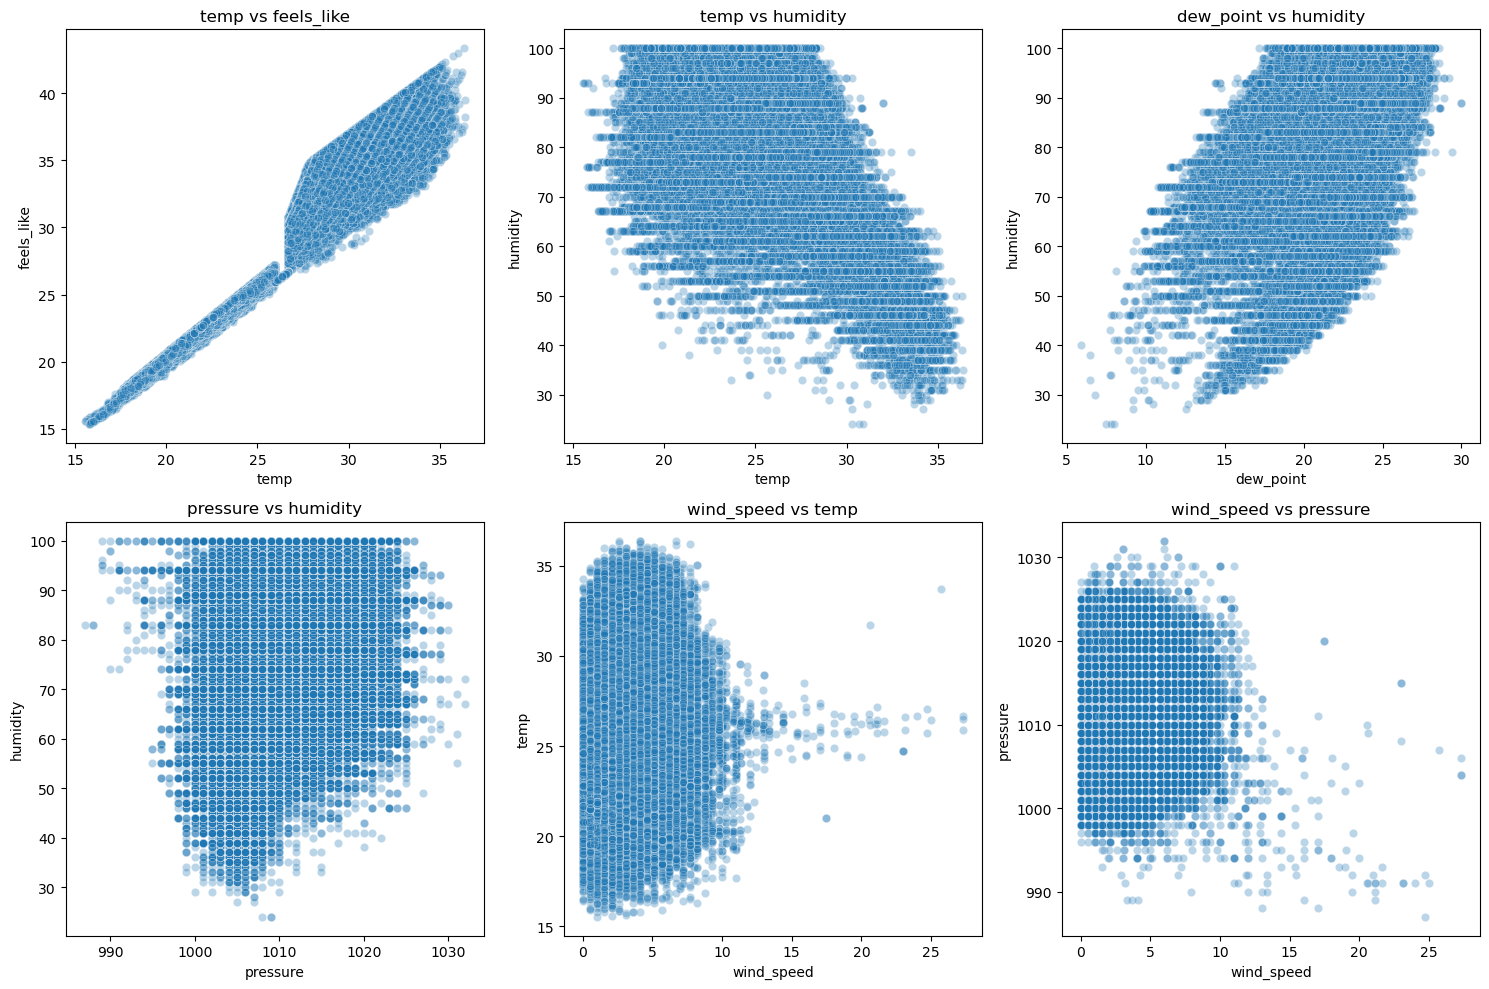

In [25]:
# Scatter Plots for selected pairs to explore relationships
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
scatter_pairs = [('temp', 'feels_like'), ('temp', 'humidity'), ('dew_point', 'humidity'),
                 ('pressure', 'humidity'), ('wind_speed', 'temp'), ('wind_speed', 'pressure')]

for i, (x, y) in enumerate(scatter_pairs):
    sns.scatterplot(data=weather_data, x=x, y=y, alpha=0.3, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f'{x} vs {y}')

fig.tight_layout()

In [ ]:
"""Scatter Plots between Feature Pairs
temp vs feels_like: There is an almost linear relationship between temperature and feels-like temperature, showing that feels-like temperature usually increases as the actual temperature rises. This strong correlation indicates that feels-like temperature depends significantly on the actual temperature.
temp vs humidity: As temperature increases, humidity tends to decrease, which is common in hot, dry climates. This shows an inverse relationship between temperature and humidity.
dew_point vs humidity: There is a positive relationship between humidity and dew point, where higher humidity correlates with a higher dew point. This makes sense because a high dew point typically accompanies high humidity.
pressure vs humidity: There is no clear relationship between pressure and humidity, indicating relative independence between these two factors in the data.
wind_speed vs temp: Wind speed can be high at any temperature, but there is no clear relationship between wind speed and temperature.
wind_speed vs pressure: Wind speed tends to be higher at lower pressure levels, which is commonly observed in adverse weather conditions, such as storms or low-pressure systems."""

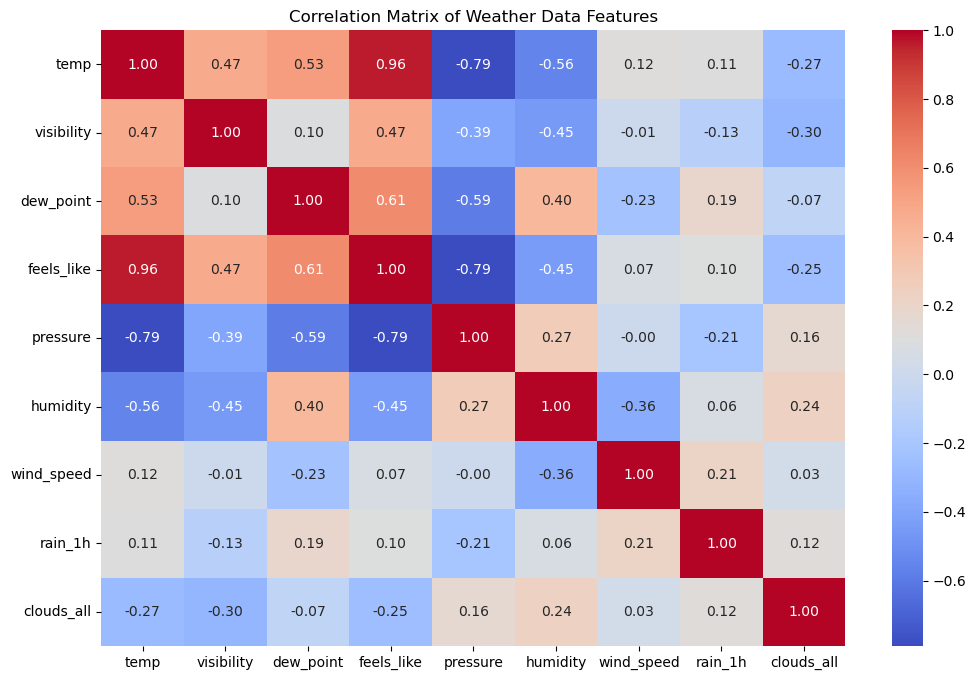

In [21]:
# Correlation Plot to show correlation between features
plt.figure(figsize=(12, 8))
correlation_matrix = weather_data[continuous_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Weather Data Features')

plt.show()


In [ ]:
"""Correlation Matrix
temp and feels_like: Very high correlation (0.96), confirming a strong link between temperature and feels-like temperature.
humidity and dew_point: Moderate correlation (0.40), indicating that as humidity rises, dew point also tends to increase.
temp and pressure: Negative correlation (-0.79), showing that as temperature rises, pressure tends to decrease.
humidity and pressure: Weak negative relationship (-0.45), indicating that pressure may slightly decrease as humidity rises.
Other features like wind_speed, rain_1h, and clouds_all do not show strong correlations with each other or with other features."""

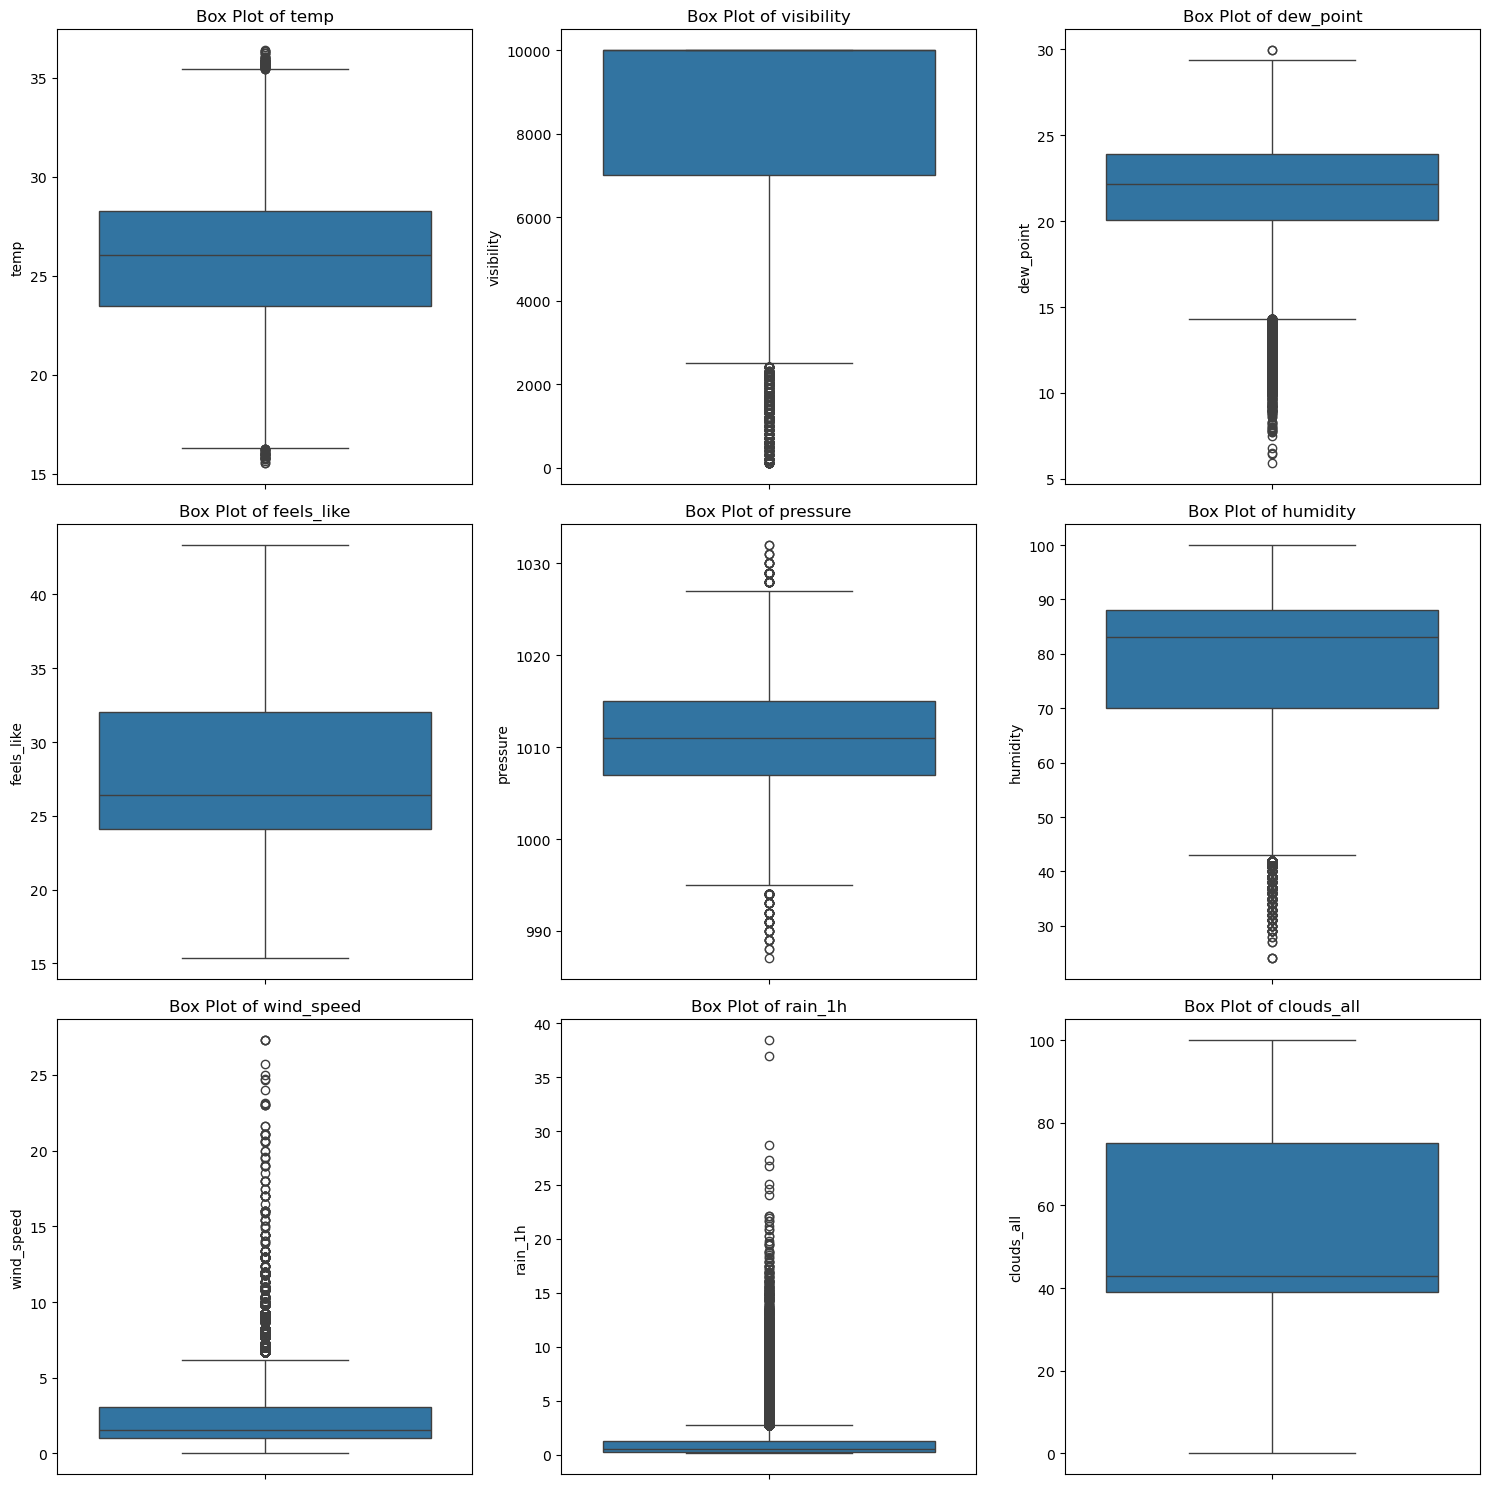

In [23]:
# Creating box plots for each continuous feature to show the spread and detect outliers
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for i, feature in enumerate(continuous_features):
    sns.boxplot(data=weather_data, y=feature, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f'Box Plot of {feature}')

fig.tight_layout()
plt.show()


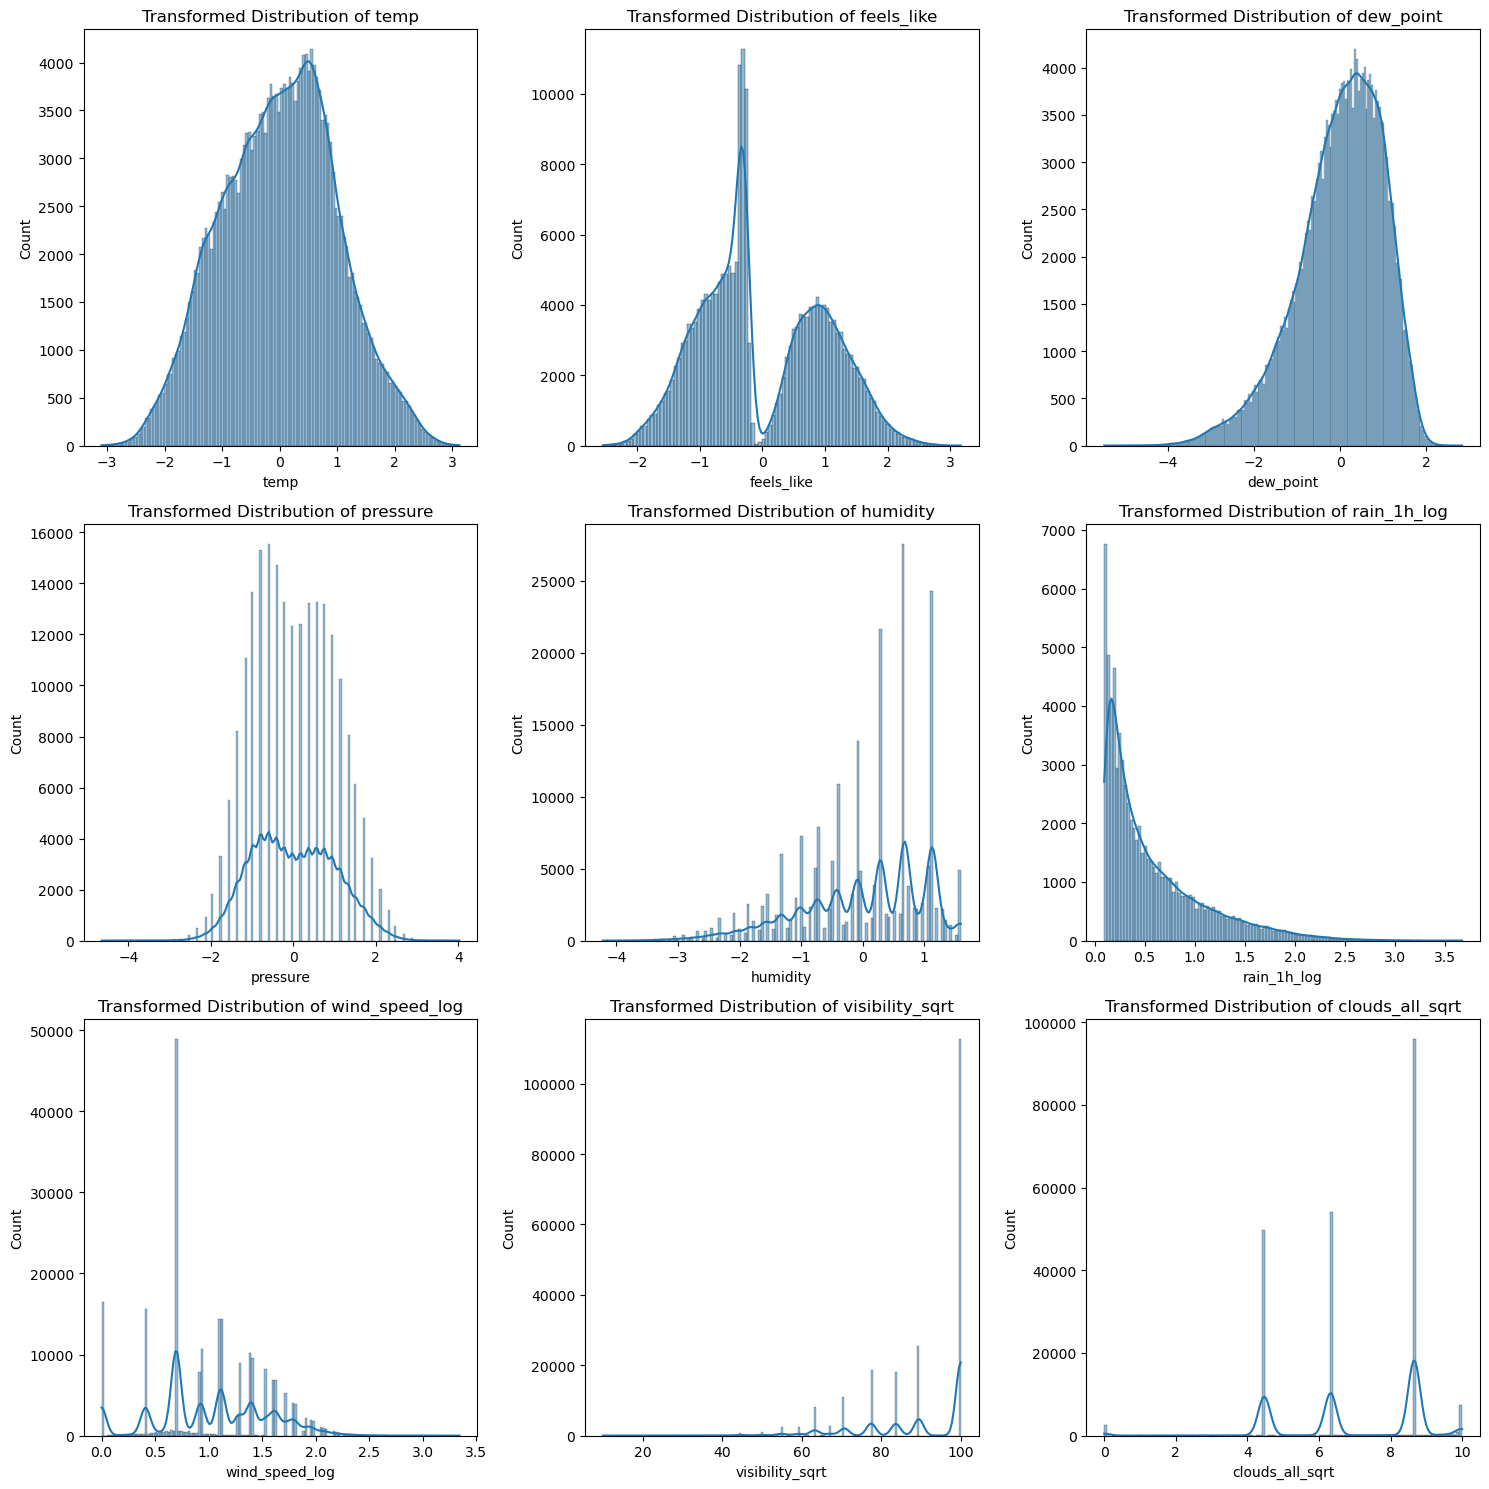

In [29]:
import numpy as np

# Creating a copy of the data to apply transformations
transformed_data = weather_data.copy()

# Log Transformation (adding a small constant to avoid log(0))
transformed_data['rain_1h_log'] = np.log1p(transformed_data['rain_1h'])
transformed_data['wind_speed_log'] = np.log1p(transformed_data['wind_speed'])

# Square Root Transformation
transformed_data['visibility_sqrt'] = np.sqrt(transformed_data['visibility'])
transformed_data['clouds_all_sqrt'] = np.sqrt(transformed_data['clouds_all'])

# Standard Scaling (Z-score normalization) for other features with less skew but with potential outliers
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_to_scale = ['temp', 'feels_like', 'dew_point', 'pressure', 'humidity']
transformed_data[features_to_scale] = scaler.fit_transform(transformed_data[features_to_scale])

# Visualizing the transformed distributions
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Histograms for transformed features
transformed_features = ['temp', 'feels_like', 'dew_point', 'pressure', 'humidity', 
                        'rain_1h_log', 'wind_speed_log', 'visibility_sqrt', 'clouds_all_sqrt']
for i, feature in enumerate(transformed_features):
    sns.histplot(transformed_data[feature].dropna(), kde=True, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f'Transformed Distribution of {feature}')

fig.tight_layout()
plt.show()


In [ ]:
""""Temperature (temp):

Distribution: Most temperatures fall within a typical range, but extreme values are present.
Outliers: Values significantly above 30°C or below 20°C are outliers, although high temperatures are not extreme enough to consider as severe outliers.
Visibility:

Distribution: The majority of visibility readings are close to the maximum (10,000 meters).
Outliers: Low visibility readings (less than 5000 meters) are marked as outliers, likely indicating foggy or poor weather conditions.
Dew Point:

Distribution: The range of dew points is quite narrow, reflecting moderate to high humidity levels.
Outliers: Dew points above 25°C are considered outliers and indicate very humid conditions, while very low values could signal dry weather.
Feels Like (feels_like):

Distribution: Mostly follows temperature trends, but extreme values occur when temperature feels significantly warmer or cooler.
Outliers: Outliers occur at higher feels-like temperatures, particularly above 35°C, which could represent extreme humidity or very warm weather conditions.
Pressure:

Distribution: Pressure is fairly consistent, with values centered around a narrow range, typical of standard atmospheric pressure.
Outliers: Low outliers (below 1000 hPa) and high outliers (above 1020 hPa) could indicate significant weather changes, such as storms or high-pressure systems.
Humidity:

Distribution: Humidity levels are generally high, with a large portion close to 100%.
Outliers: Humidity values below 50% are outliers, suggesting unusually dry conditions compared to the dataset's average.
Wind Speed:

Distribution: Wind speed varies considerably, with many lower values.
Outliers: High wind speeds (above 10 m/s) are outliers and may indicate windy or stormy conditions, as these values are above the typical calm-to-moderate range.
Rainfall in 1 Hour (rain_1h):

Distribution: Most values are near zero, as rain events are less frequent.
Outliers: Significant outliers are present for values above 5 mm, indicating heavy rainfall events or short-term storms.
Cloud Cover (clouds_all):

Distribution: Cloud cover is spread across all ranges, from clear to overcast.
Outliers: Limited outliers due to its spread; cloud cover values are mostly normally distributed across the 0–100% range.
Implications of Outliers
Weather Events: Outliers in temperature, wind speed, rainfall, and visibility often correspond to extreme or unusual weather conditions.
Impact on Analysis: Outliers may affect statistical measures like mean and correlation. For predictive modeling, these points could be useful in identifying extreme weather patterns or might need to be handled separately depending on model sensitivity.
Would you like to address these outliers by removing them, transforming th"""

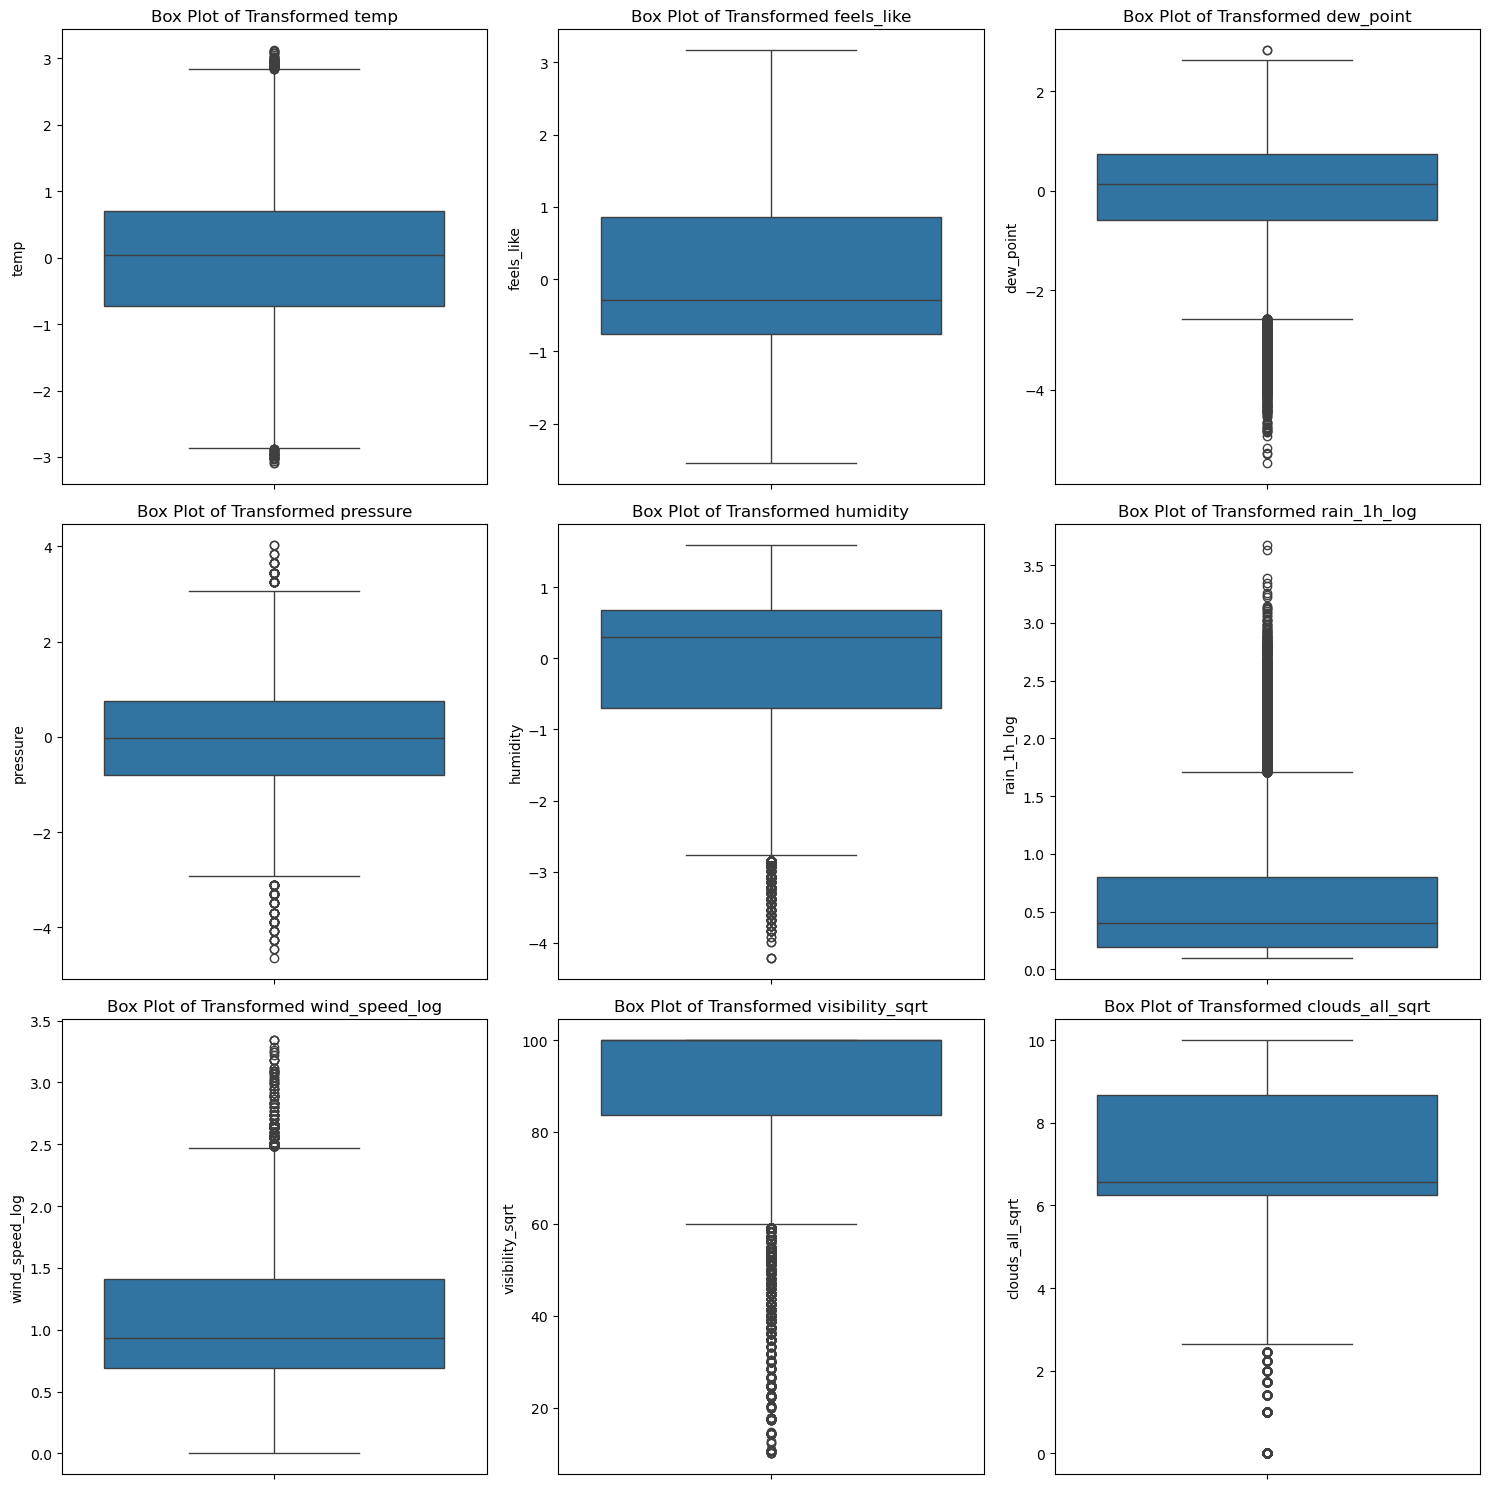

In [31]:
# Creating box plots for transformed features to show spread and check for reduced outlier impact
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Updated list of transformed features for box plot visualization
for i, feature in enumerate(transformed_features):
    sns.boxplot(data=transformed_data, y=feature, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f'Box Plot of Transformed {feature}')

fig.tight_layout()
plt.show()


In [ ]:
"""Rainfall and Wind Speed (Log Transformation): The high outliers are significantly minimized, showing a more balanced distribution.
Visibility and Cloud Cover (Square Root Transformation): Outliers are less prominent, with a more compressed range.
Temperature, Feels Like, Dew Point, Pressure, and Humidity (Standard Scaling): Outliers have reduced influence, with these features centered around the mean (0) and limited spread outside the interquartile range."""

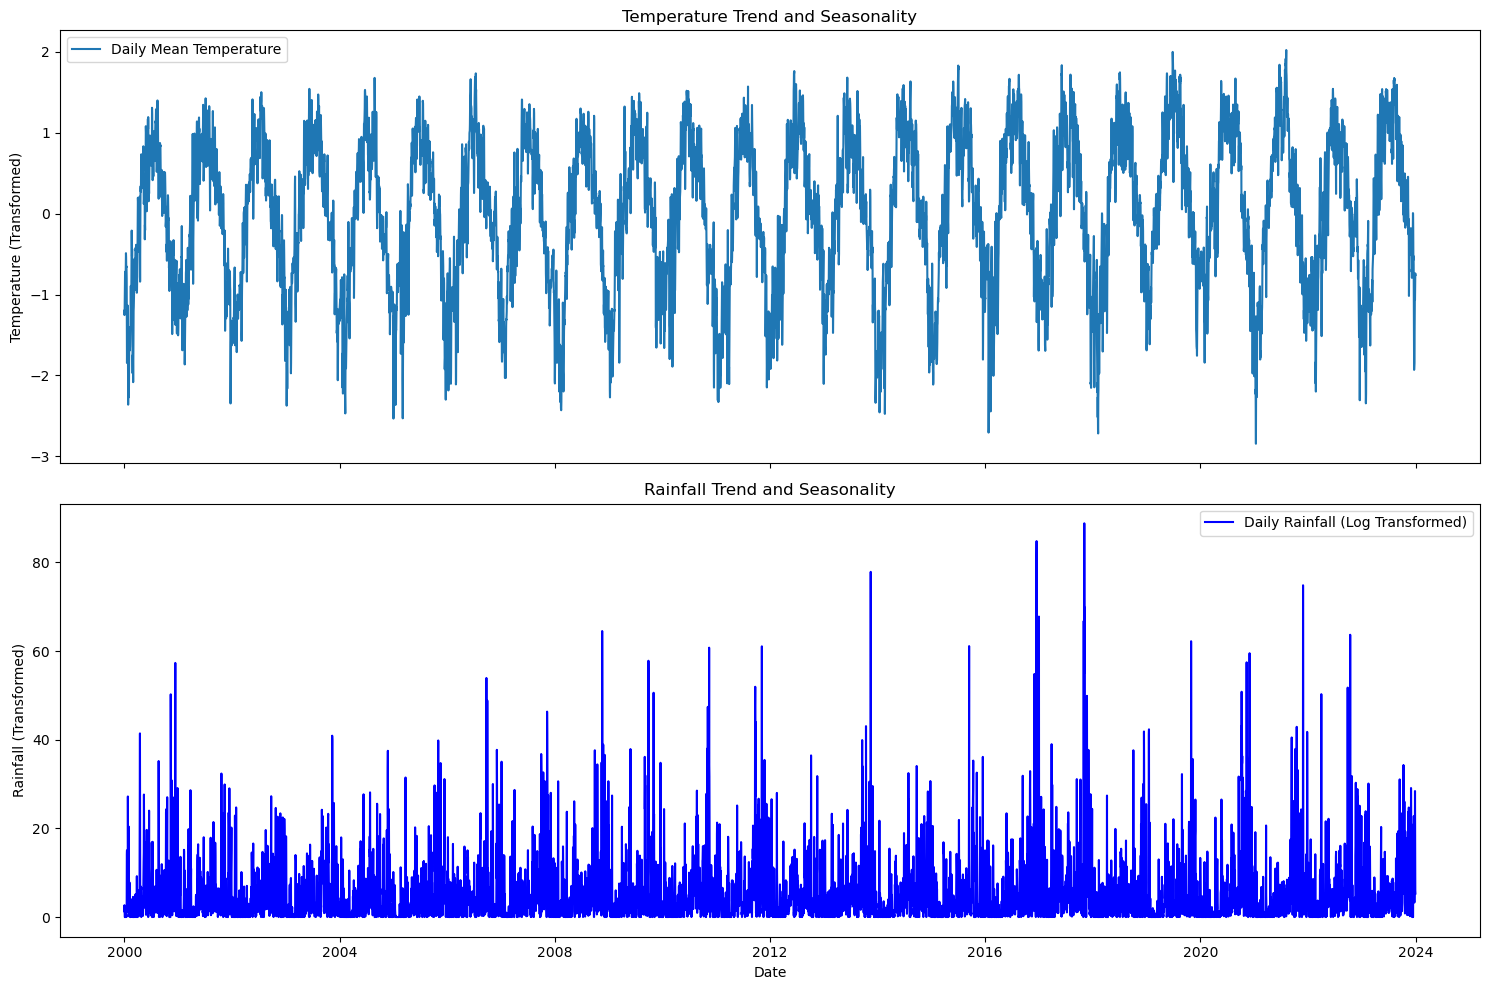

In [33]:
# Convert 'dt_iso' to datetime format for trend and seasonality analysis
transformed_data['dt_iso'] = pd.to_datetime(weather_data['dt_iso'])

# Set the datetime column as the index for easier time series analysis
time_data = transformed_data.set_index('dt_iso')

# Resampling data to daily means for a clearer trend in temperature and daily sums for rain
daily_temp = time_data['temp'].resample('D').mean()
daily_rain = time_data['rain_1h_log'].resample('D').sum()

# Plotting trend and seasonality for temperature and rainfall
fig, axes = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

# Temperature Trend and Seasonality
axes[0].plot(daily_temp, label='Daily Mean Temperature')
axes[0].set_title('Temperature Trend and Seasonality')
axes[0].set_ylabel('Temperature (Transformed)')
axes[0].legend()

# Rainfall Trend and Seasonality
axes[1].plot(daily_rain, label='Daily Rainfall (Log Transformed)', color='b')
axes[1].set_title('Rainfall Trend and Seasonality')
axes[1].set_ylabel('Rainfall (Transformed)')
axes[1].legend()

plt.xlabel('Date')
plt.tight_layout()
plt.show()


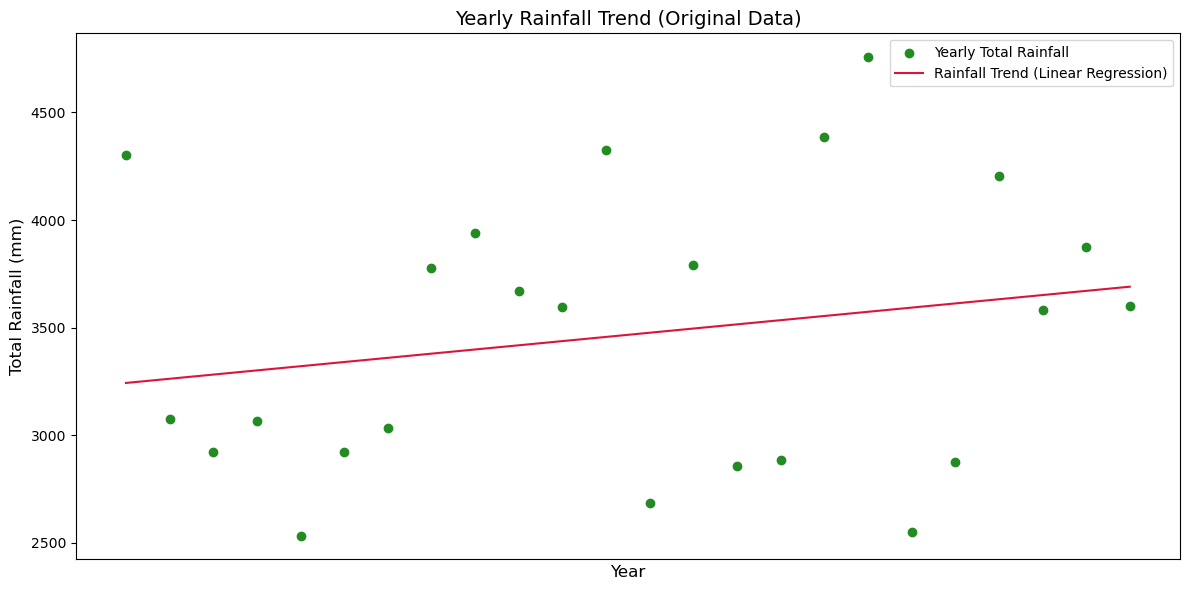

In [57]:


# Resample original rainfall data to yearly sums
yearly_rain_original = weather_data['rain_1h'].resample('Y').sum()

# Prepare data for linear regression on original rainfall data
years = np.array([d.year for d in yearly_rain_original.index]).reshape(-1, 1)

# Linear regression for rainfall trend (original data)
rain_model_original = LinearRegression()
rain_model_original.fit(years, yearly_rain_original)
rain_trend_original = rain_model_original.predict(years)

# Plotting the scatter plot with linear regression line for original rainfall data
plt.figure(figsize=(12, 6))
plt.scatter(years, yearly_rain_original, color='forestgreen', label='Yearly Total Rainfall')
plt.plot(years, rain_trend_original, color='crimson', label='Rainfall Trend (Linear Regression)')
plt.title('Yearly Rainfall Trend (Original Data)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Rainfall (mm)', fontsize=12)
plt.xticks(years.flatten(), rotation=45)  # Set all years as x-ticks
plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))  # Major ticks every 5 years
plt.legend()
plt.tight_layout()
plt.show()



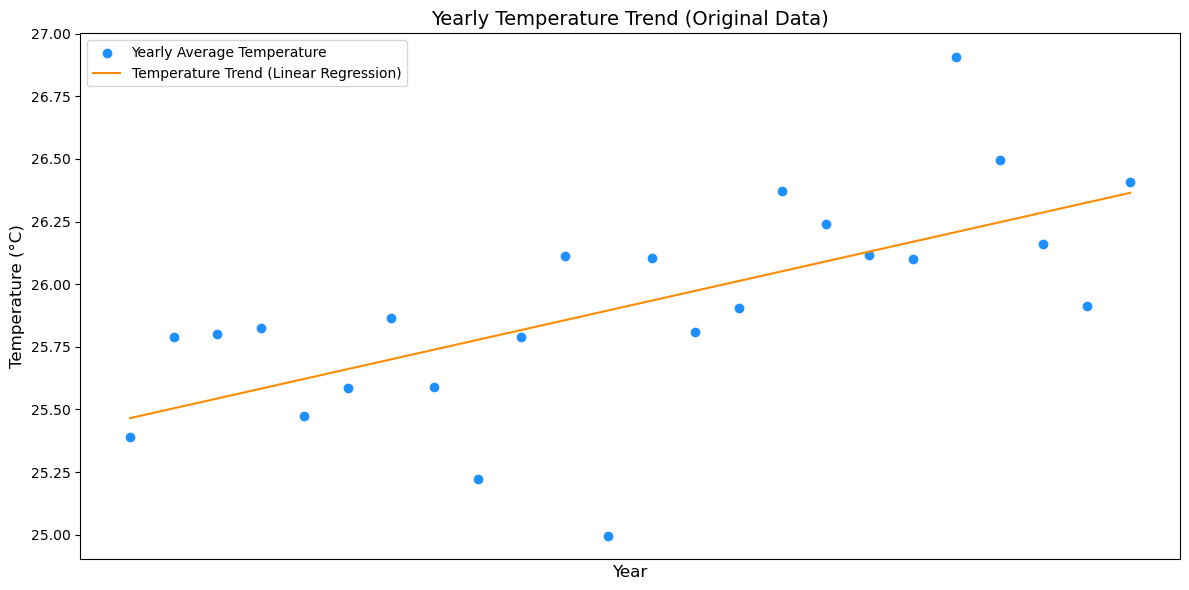

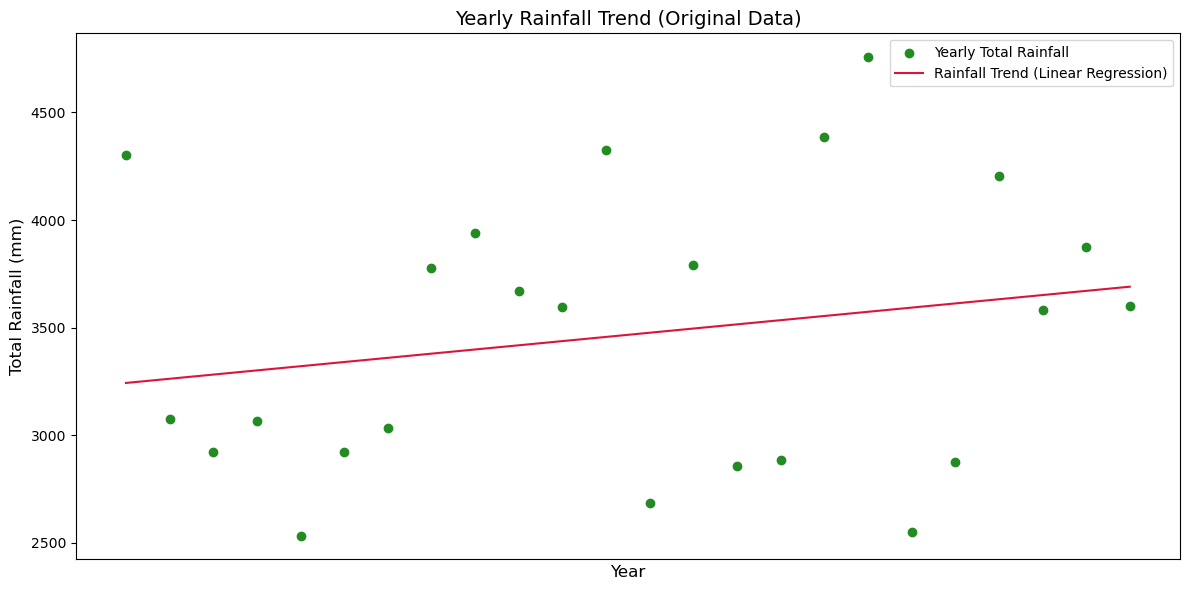

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import matplotlib.dates as mdates



# Resample original data to yearly means for temperature and yearly sums for rainfall
yearly_temp_original = weather_data['temp'].resample('Y').mean()
yearly_rain_original = weather_data['rain_1h'].resample('Y').sum()

# Prepare data for linear regression on original data
years = np.array([d.year for d in yearly_temp_original.index]).reshape(-1, 1)

# Linear regression for temperature trend (original data)
temp_model_original = LinearRegression()
temp_model_original.fit(years, yearly_temp_original)
temp_trend_original = temp_model_original.predict(years)

# Linear regression for rainfall trend (original data)
rain_model_original = LinearRegression()
rain_model_original.fit(years, yearly_rain_original)
rain_trend_original = rain_model_original.predict(years)

# Plotting the scatter plots with linear regression lines on original data

# Temperature Scatter Plot with Trend Line (Original Data)
plt.figure(figsize=(12, 6))
plt.scatter(years, yearly_temp_original, color='dodgerblue', label='Yearly Average Temperature')
plt.plot(years, temp_trend_original, color='darkorange', label='Temperature Trend (Linear Regression)')
plt.title('Yearly Temperature Trend (Original Data)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.xticks(years.flatten(), rotation=45)  # Set all years as x-ticks
plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))  # Show all years as major ticks
plt.legend()
plt.tight_layout()
plt.show()

# Rainfall Scatter Plot with Trend Line (Original Data)
plt.figure(figsize=(12, 6))
plt.scatter(years, yearly_rain_original, color='forestgreen', label='Yearly Total Rainfall')
plt.plot(years, rain_trend_original, color='crimson', label='Rainfall Trend (Linear Regression)')
plt.title('Yearly Rainfall Trend (Original Data)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Rainfall (mm)', fontsize=12)
plt.xticks(years.flatten(), rotation=45)  # Set all years as x-ticks
plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))  # Show all years as major ticks
plt.legend()
plt.tight_layout()
plt.show()



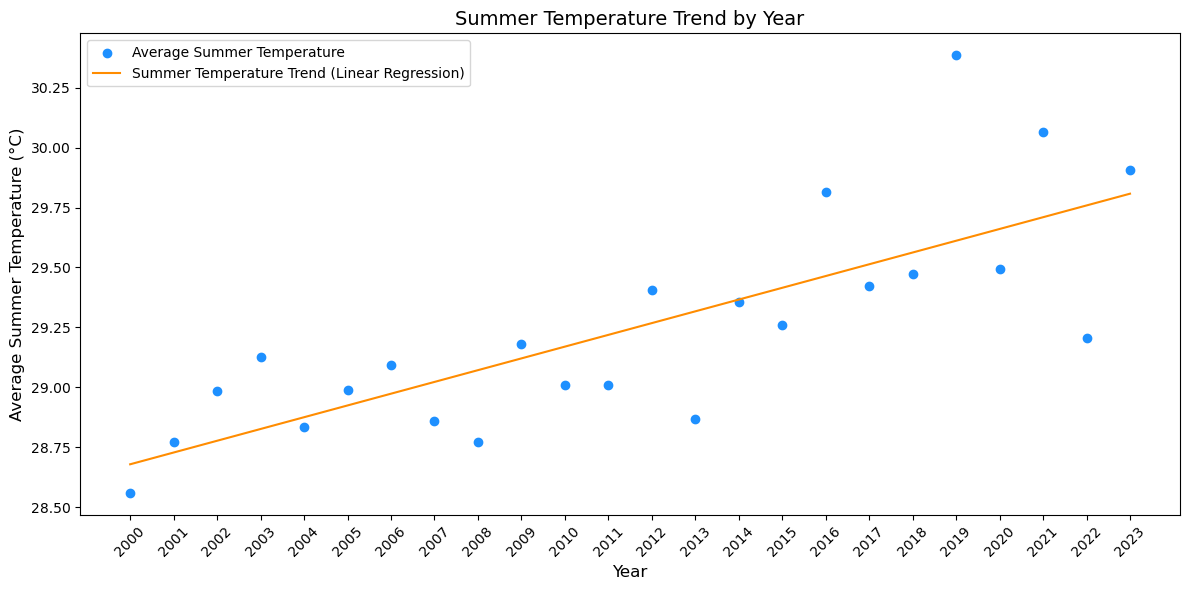

0.04908122671068239

In [67]:
# Filter data to include only summer months (June, July, August) across all years
summer_months = weather_data[weather_data.index.month.isin([6, 7, 8])]

# Resample summer data to get average temperature per summer season each year
summer_temp_by_year = summer_months['temp'].resample('Y').mean()

# Prepare data for linear regression on summer temperatures by year
summer_years = np.array([d.year for d in summer_temp_by_year.index]).reshape(-1, 1)

# Linear regression for summer temperature trend
summer_temp_model = LinearRegression()
summer_temp_model.fit(summer_years, summer_temp_by_year)
summer_temp_trend = summer_temp_model.predict(summer_years)

# Re-plotting with all years as x-ticks explicitly set to display all available years

plt.figure(figsize=(12, 6))
plt.scatter(summer_years, summer_temp_by_year, color='dodgerblue', label='Average Summer Temperature')
plt.plot(summer_years, summer_temp_trend, color='darkorange', label='Summer Temperature Trend (Linear Regression)')
plt.title('Summer Temperature Trend by Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Summer Temperature (°C)', fontsize=12)
plt.xticks(summer_years.flatten(), rotation=45)  # Explicitly setting each year as a tick on x-axis
plt.legend()
plt.tight_layout()
plt.show()


# Displaying regression coefficient for trend analysis on summer temperature data
summer_temp_slope = summer_temp_model.coef_[0]
summer_temp_slope




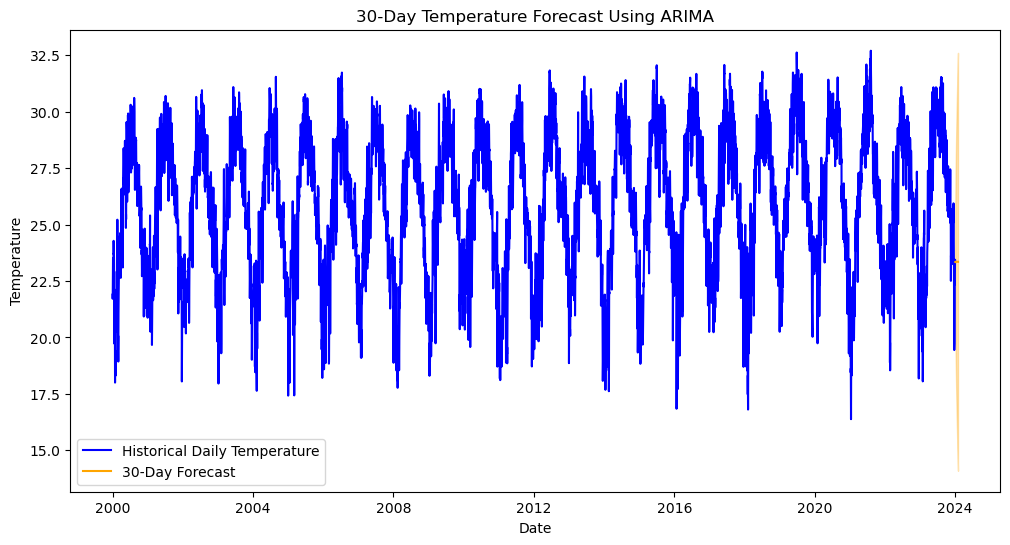

y,mean,mean_ci_lower,mean_ci_upper
2024-01-01,23.343592,21.905726,24.781458
2024-01-02,23.350337,21.075966,25.624708
2024-01-03,23.348588,20.522158,26.175017
2024-01-04,23.349041,20.050810,26.647273
2024-01-05,23.348924,19.640992,27.056855
2024-01-06,23.348954,19.271681,27.426227
2024-01-07,23.348946,18.933262,27.764630
2024-01-08,23.348948,18.618969,28.078928
2024-01-09,23.348948,18.324302,28.373594
2024-01-10,23.348948,18.045982,28.651913


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import warnings
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# # Suppress warnings from the ARIMA model
# warnings.filterwarnings("ignore")

# # Load dataset
# file_path = 'filtered_weather_data.csv'
# weather_data = pd.read_csv(file_path)

# # Data preparation: Convert date column to datetime format
# weather_data['dt_iso'] = pd.to_datetime(weather_data['dt_iso'])

# # Set datetime as the index for resampling
# weather_data.set_index('dt_iso', inplace=True)

# Resample data to daily mean temperature
daily_temp = weather_data['temp'].resample('D').mean().fillna(method='ffill')

# Standard Scaling for Temperature (optional, depending on the scale of data)
scaler = StandardScaler()
daily_temp_scaled = pd.Series(scaler.fit_transform(daily_temp.values.reshape(-1, 1)).flatten(), index=daily_temp.index)

# Fit ARIMA model
model = ARIMA(daily_temp_scaled, order=(1, 1, 1))  # Use different orders as needed
arima_result = model.fit()

# Forecast temperature for the next 30 days
forecast_steps = 30
forecast = arima_result.get_forecast(steps=forecast_steps)
forecast_summary = forecast.summary_frame()

# Reversing the scaling (optional)
forecast_summary['mean'] = scaler.inverse_transform(forecast_summary['mean'].values.reshape(-1, 1)).flatten()
forecast_summary['mean_ci_lower'] = scaler.inverse_transform(forecast_summary['mean_ci_lower'].values.reshape(-1, 1)).flatten()
forecast_summary['mean_ci_upper'] = scaler.inverse_transform(forecast_summary['mean_ci_upper'].values.reshape(-1, 1)).flatten()

# Clean forecast summary to ensure all data is numeric
forecast_summary = forecast_summary.apply(pd.to_numeric, errors='coerce').dropna()

# Plotting the forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_temp, label='Historical Daily Temperature', color='blue')
plt.plot(forecast_summary['mean'], label='30-Day Forecast', color='orange')
plt.fill_between(forecast_summary.index, forecast_summary['mean_ci_lower'], forecast_summary['mean_ci_upper'], 
                 color='orange', alpha=0.3)
plt.title('30-Day Temperature Forecast Using ARIMA')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

# Display forecast summary
forecast_summary[['mean', 'mean_ci_lower', 'mean_ci_upper']].head(10)


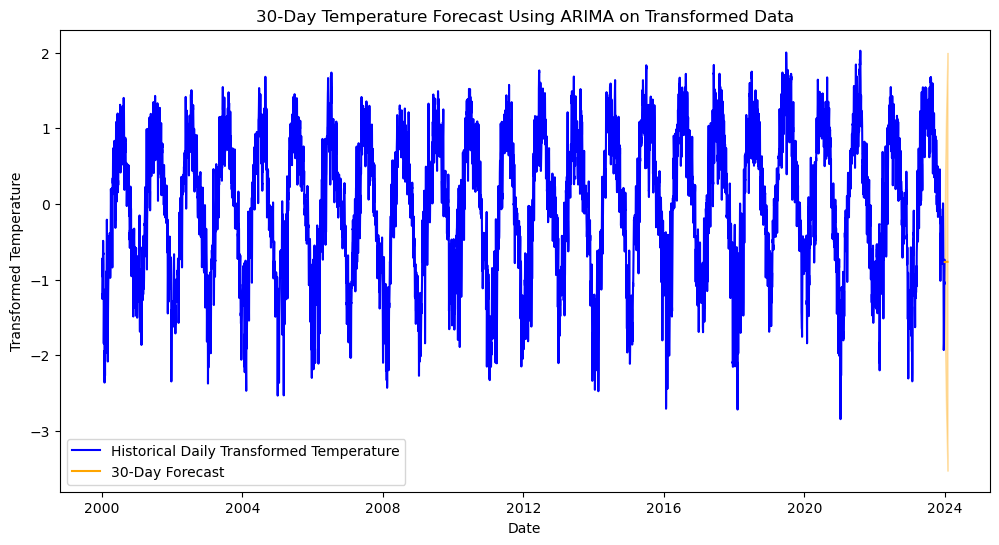

temp_transformed,mean,mean_ci_lower,mean_ci_upper
2024-01-01,-0.766867,-1.195893,-0.337842
2024-01-02,-0.764855,-1.443483,-0.086226
2024-01-03,-0.765376,-1.608736,0.077983
2024-01-04,-0.765241,-1.749380,0.218897
2024-01-05,-0.765276,-1.871665,0.341112
2024-01-06,-0.765267,-1.981862,0.451328
2024-01-07,-0.765270,-2.082842,0.552303
2024-01-08,-0.765269,-2.176623,0.646085
2024-01-09,-0.765269,-2.264548,0.734010
2024-01-10,-0.765269,-2.347595,0.817057


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import warnings
from sklearn.preprocessing import StandardScaler

# Suppress warnings from the ARIMA model
warnings.filterwarnings("ignore")




# Apply transformations as handled previously
# Log transformation, square root transformations, and Standard Scaling
weather_data['temp_transformed'] = StandardScaler().fit_transform(weather_data['temp'].values.reshape(-1, 1))

# Resample data to daily mean for the transformed temperature data
daily_temp = weather_data['temp_transformed'].resample('D').mean().fillna(method='ffill')

# Fit ARIMA model on the transformed temperature data
model = ARIMA(daily_temp, order=(1, 1, 1))  # Adjust order as necessary for best results
arima_result = model.fit()

# Forecast temperature for the next 30 days
forecast_steps = 30
forecast = arima_result.get_forecast(steps=forecast_steps)
forecast_summary = forecast.summary_frame()

# Plotting the forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_temp, label='Historical Daily Transformed Temperature', color='blue')
plt.plot(forecast_summary['mean'], label='30-Day Forecast', color='orange')
plt.fill_between(forecast_summary.index, forecast_summary['mean_ci_lower'], forecast_summary['mean_ci_upper'], 
                 color='orange', alpha=0.3)
plt.title('30-Day Temperature Forecast Using ARIMA on Transformed Data')
plt.xlabel('Date')
plt.ylabel('Transformed Temperature')
plt.legend()
plt.show()

# Display forecast summary for reference
forecast_summary[['mean', 'mean_ci_lower', 'mean_ci_upper']].head(10)
